In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
import yfinance as yf

start = '2010-01-01'
end = '2019-12-31'
df = yf.download('AAPL', start=start, end=end)
print(df.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.440331  6.455076  6.391278  6.422876  493729600
2010-01-05  6.451468  6.487881  6.417462  6.458089  601904800
2010-01-06  6.348847  6.477046  6.342226  6.451466  552160000
2010-01-07  6.337110  6.379844  6.291067  6.372320  477131200
2010-01-08  6.379241  6.379843  6.291368  6.328683  447610800


In [3]:
# Filter numeric columns for statistical operations
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Basic Statistics
mean_values = numeric_df.mean()
median_values = numeric_df.median()
std_values = numeric_df.std()
variance_values = numeric_df.var()

print("Mean Values:\n", mean_values)
print("\nMedian Values:\n", median_values)
print("\nStandard Deviation:\n", std_values)
print("\nVariance:\n", variance_values)

# Mode (special handling as it can return multiple rows)
mode_values = numeric_df.mode()
print("\nMode Values:\n", mode_values.iloc[0])  # Picking first row of mode

Mean Values:
 Price   Ticker
Close   AAPL      2.517547e+01
High    AAPL      2.539245e+01
Low     AAPL      2.494205e+01
Open    AAPL      2.516912e+01
Volume  AAPL      2.996722e+08
dtype: float64

Median Values:
 Price   Ticker
Close   AAPL      2.231062e+01
High    AAPL      2.248117e+01
Low     AAPL      2.211400e+01
Open    AAPL      2.227961e+01
Volume  AAPL      2.220316e+08
dtype: float64

Standard Deviation:
 Price   Ticker
Close   AAPL      1.392228e+01
High    AAPL      1.402489e+01
Low     AAPL      1.379961e+01
Open    AAPL      1.390289e+01
Volume  AAPL      2.352933e+08
dtype: float64

Variance:
 Price   Ticker
Close   AAPL      1.938298e+02
High    AAPL      1.966975e+02
Low     AAPL      1.904293e+02
Open    AAPL      1.932905e+02
Volume  AAPL      5.536295e+16
dtype: float64

Mode Values:
 Price   Ticker
Close   AAPL      9.785233e+00
High    AAPL      5.898345e+00
Low     AAPL      5.725309e+00
Open    AAPL      5.789106e+00
Volume  AAPL      9.743360e+07
Name: 0, d

In [4]:
# Fill missing data with mean
df_filled_mean = df.fillna(df.mean())

# Fill missing data with the mode (most frequent value)
df_filled_mode = df.fillna(df.mode().iloc[0])

# Print the first few rows of the mode-filled DataFrame
print(df_filled_mode.head())

# Fill missing data with a specific value
df_filled_custom = df.fillna(0)  # Replace missing values with 0
print(df_filled_mean.head())

# Drop rows with missing values
df_dropped_rows = df.dropna()

# Drop columns with missing values
df_dropped_columns = df.dropna(axis=1)

print(df_dropped_rows.head())
print(df_dropped_columns.head())

Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.440332  6.455078  6.391279  6.422878  493729600
2010-01-05  6.451467  6.487880  6.417460  6.458087  601904800
2010-01-06  6.348847  6.477046  6.342226  6.451466  552160000
2010-01-07  6.337109  6.379843  6.291066  6.372319  477131200
2010-01-08  6.379240  6.379842  6.291367  6.328682  447610800
Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.440332  6.455078  6.391279  6.422878  493729600
2010-01-05  6.451467  6.487880  6.417460  6.458087  601904800
2010-01-06  6.348847  6.477046  6.342226  6.451466  552160000
2010-01-07  6.337109  6.379843  6.291066  6.372319  477131200
2010-01-08  6.379240  6.379842  6.291367  6.328682  447610800
Price   

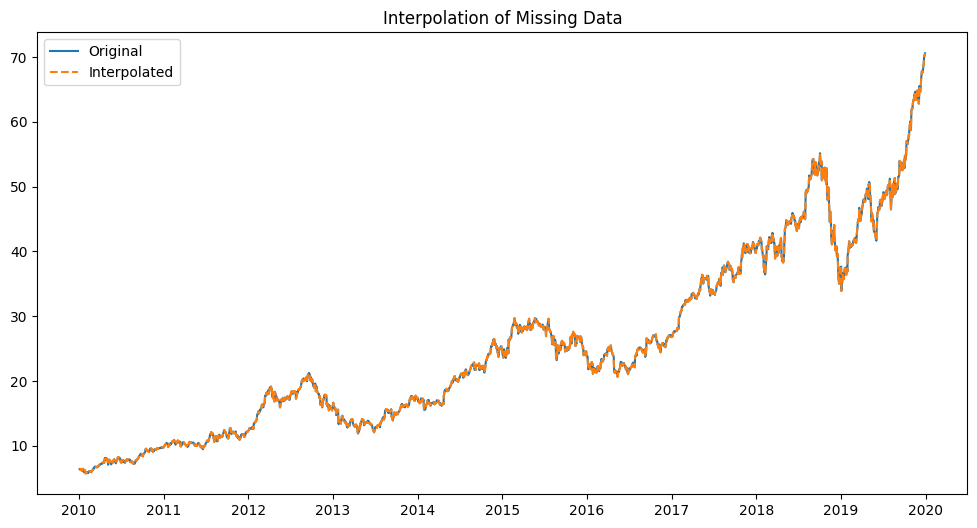

In [4]:
# Interpolate missing data (linear method)
df_interpolated = df.interpolate(method='linear')

# Interpolation visualized
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Original')
plt.plot(df_interpolated['Close'], label='Interpolated', linestyle='dashed')
plt.title("Interpolation of Missing Data")
plt.legend()
plt.show()

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

# Load dataset
start = '2010-01-01'
end = '2019-12-31'
df = yf.download('AAPL', start=start, end=end)

# Verify column names and handle MultiIndex
print("Columns in the dataset:\n", df.columns)

# Flatten MultiIndex (if applicable)
if isinstance(df.columns, pd.MultiIndex):
    df.columns = [col[1] if col[1] else col[0] for col in df.columns]

# Check if 'Close' column exists
if 'Close' in df.columns:
    # Ensure 'Close' column is numeric
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')  # Convert non-numeric values to NaN

    # Handle missing values
    df = df.dropna(subset=['Close'])  # Drop rows with missing values in 'Close'

    # Alternatively, fill missing values with mean
    # df['Close'] = df['Close'].fillna(df['Close'].mean())

    # Generate the box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df['Close'], color='skyblue')
    plt.title("Box Plot of Closing Prices")
    plt.show()
else:
    print("'Close' column not found in the dataset.")

[*********************100%***********************]  1 of 1 completed

Columns in the dataset:
 MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])
'Close' column not found in the dataset.


[*********************100%***********************]  1 of 1 completed


Dataset Overview:

Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.440331  6.455076  6.391278  6.422876  493729600
2010-01-05  6.451468  6.487881  6.417462  6.458089  601904800
2010-01-06  6.348847  6.477046  6.342226  6.451466  552160000
2010-01-07  6.337110  6.379844  6.291067  6.372320  477131200
2010-01-08  6.379241  6.379843  6.291368  6.328683  447610800

Summary Statistics:

Price         Close         High          Low         Open        Volume
Ticker         AAPL         AAPL         AAPL         AAPL          AAPL
count   2515.000000  2515.000000  2515.000000  2515.000000  2.515000e+03
mean      25.175469    25.392448    24.942051    25.169120  2.996722e+08
std       13.922277    14.024887    13.799614    13.902895  2.352933e+08
min        5.779476     5.898345     5.725309     5.789106  4.544800e+07
25%       13.827217    13

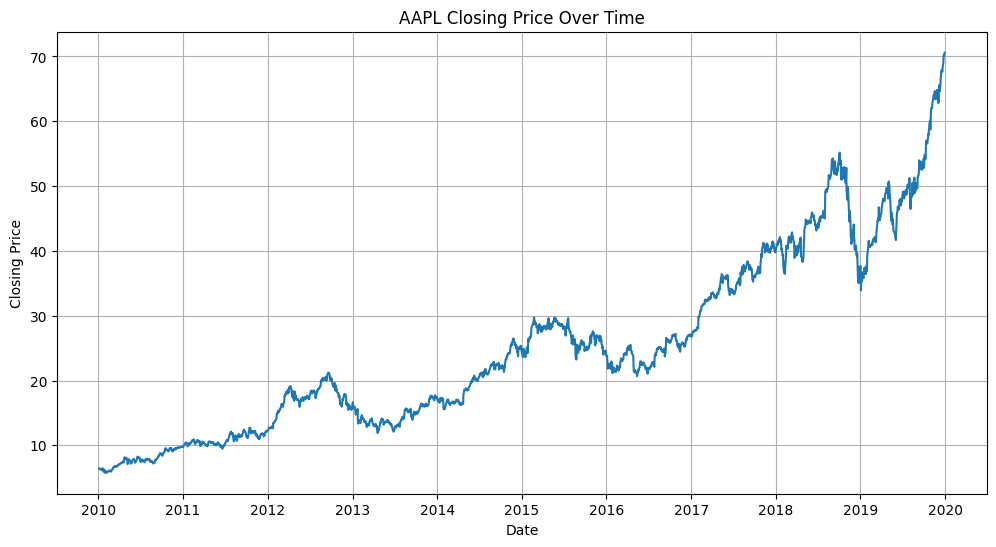

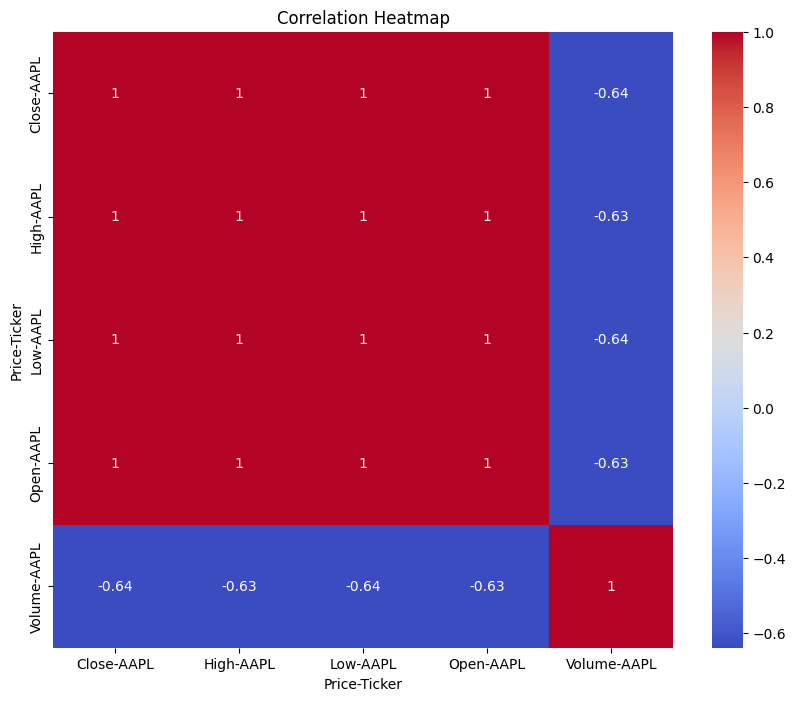

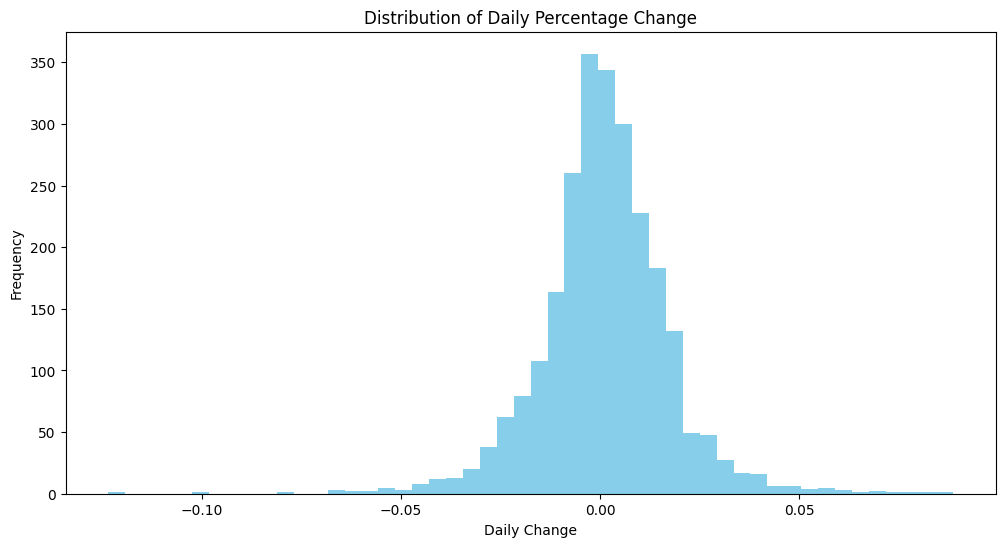

MultiIndex([(        'Date',     ''),
            (       'Close', 'AAPL'),
            (        'High', 'AAPL'),
            (         'Low', 'AAPL'),
            (        'Open', 'AAPL'),
            (      'Volume', 'AAPL'),
            ('Daily Change',     '')],
           names=['Price', 'Ticker'])


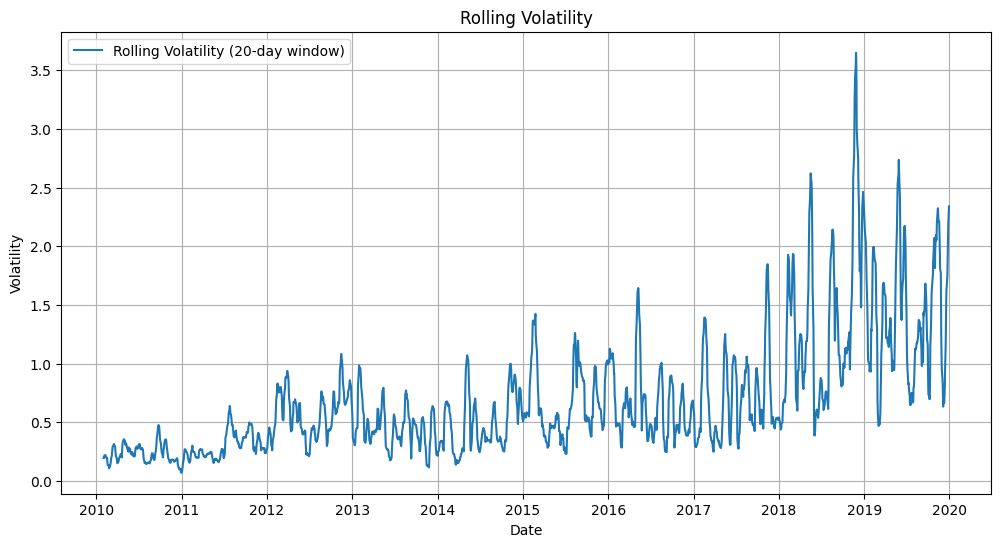

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
import yfinance as yf
start = '2010-01-01'
end = '2019-12-31'
df = yf.download('AAPL', start=start, end=end)

# Basic statistics
print("Dataset Overview:\n")
print(df.head())
print("\nSummary Statistics:\n")
print(df.describe())

# Visualizing closing price trends
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title('AAPL Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid()
plt.show()

# Correlation analysis
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Distribution of daily price changes
df['Daily Change'] = df['Close'].pct_change()
plt.figure(figsize=(12, 6))
plt.hist(df['Daily Change'].dropna(), bins=50, color='skyblue')
plt.title('Distribution of Daily Percentage Change')
plt.xlabel('Daily Change')
plt.ylabel('Frequency')
plt.show()

# Resetting index to flatten the MultiIndex
df = df.reset_index()

# Confirm available column names
print(df.columns)

# Rolling volatility on 'Close' prices
rolling_std = df['Close'].rolling(window=20).std()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], rolling_std, label='Rolling Volatility (20-day window)')
plt.title('Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid()
plt.show()

In [6]:
df.tail()

Price,Date,Close,High,Low,Open,Volume,Daily Change
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
2510,2019-12-23,68.757652,68.818178,67.878812,67.917550,98572000,0.016318
2511,2019-12-24,68.823029,68.973140,68.496193,68.924716,48478800,0.000951
2512,2019-12-26,70.188499,70.205449,68.927137,68.956189,93121200,0.019840
2513,2019-12-27,70.161858,71.171436,69.755124,70.481437,146266000,-0.000380
2514,2019-12-30,70.578278,70.861543,69.053023,70.079543,144114400,0.005935


In [17]:
df=df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04,6.440331,6.455077,6.391278,6.422877,493729600
1,2010-01-05,6.451466,6.487879,6.417459,6.458086,601904800
2,2010-01-06,6.348845,6.477044,6.342225,6.451465,552160000
3,2010-01-07,6.337111,6.379844,6.291068,6.372321,477131200
4,2010-01-08,6.379240,6.379842,6.291368,6.328683,447610800


In [18]:
df = df.drop(['Date', 'Adj Close'], axis=1, errors='ignore')
df.head()

C:\Users\appua\AppData\Local\Temp\ipykernel_17084\2506290264.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date', 'Adj Close'], axis=1, errors='ignore')


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.440331,6.455077,6.391278,6.422877,493729600
1,6.451466,6.487879,6.417459,6.458086,601904800
2,6.348845,6.477044,6.342225,6.451465,552160000
3,6.337111,6.379844,6.291068,6.372321,477131200
4,6.379240,6.379842,6.291368,6.328683,447610800


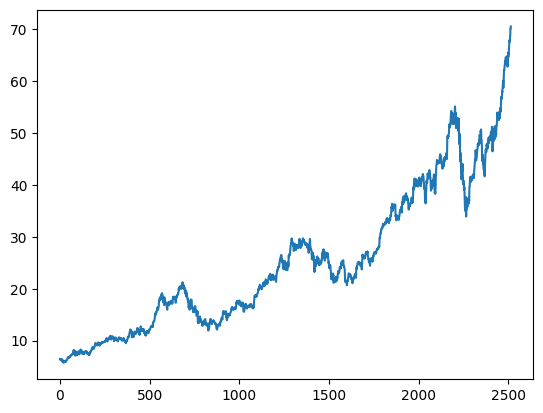

In [19]:
plt.plot(df.Close)


In [23]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.440331,6.455077,6.391278,6.422877,493729600
1,6.451465,6.487878,6.417459,6.458086,601904800
2,6.348846,6.477045,6.342225,6.451465,552160000
3,6.337108,6.379841,6.291065,6.372318,477131200
4,6.379242,6.379844,6.291369,6.328685,447610800
...,...,...,...,...,...
2510,68.757652,68.818178,67.878812,67.917550,98572000
2511,68.823029,68.973140,68.496193,68.924716,48478800
2512,70.188492,70.205441,68.927130,68.956181,93121200


In [20]:
ma100=df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,57.212838
2511,57.410469
2512,57.647437
2513,57.875337


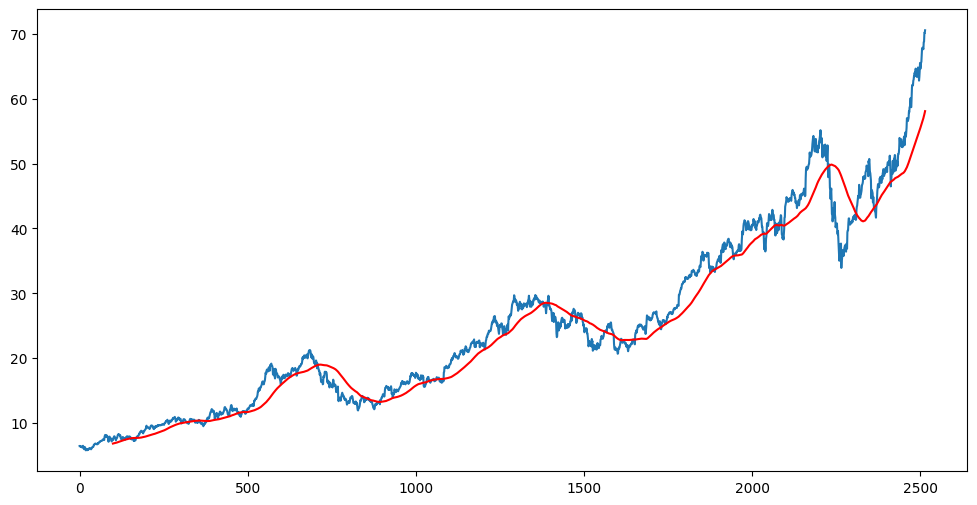

In [21]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [22]:
ma200=df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,52.164466
2511,52.291901
2512,52.425207
2513,52.555959


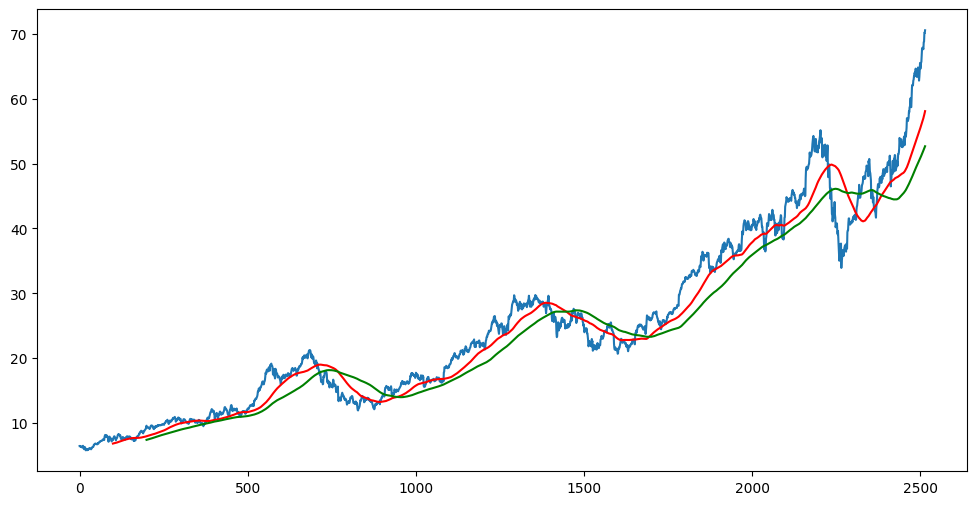

In [23]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')


In [9]:
df.shape

(2515, 5)

In [10]:
#spliting

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [11]:
data_training.head()

Ticker,AAPL
Date,
2010-01-04,6.440333
2010-01-05,6.451466
2010-01-06,6.348846
2010-01-07,6.337109
2010-01-08,6.379241


In [26]:
data_testing.head()

Ticker,AAPL
1760,26.996567
1761,26.786100
1762,26.862427
1763,26.832355
1764,26.968819


In [12]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler with the correct feature_range tuple
scaler = MinMaxScaler(feature_range=(0, 1))

In [13]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.0276001 ],
       [0.02806505],
       [0.02377923],
       ...,
       [0.88408419],
       [0.89123172],
       [0.88640241]])

In [14]:
data_training_array.shape

(1760, 1)

In [15]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

In [16]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [17]:

from keras.models import Sequential
from keras.layers import Input, LSTM, Dense, Dropout

model = Sequential()
model.add(Input(shape=(100, 1)))  # Input layer specifying timesteps and features
model.add(LSTM(50, return_sequences=True))  # Output sequences for stacking
model.add(Dropout(0.2))
model.add(LSTM(60, return_sequences=True))  # Output sequences for stacking
model.add(Dropout(0.3))
model.add(LSTM(80, return_sequences=True))  # Output sequences for stacking
model.add(Dropout(0.4))
model.add(LSTM(120))  # Final LSTM without return_sequences
model.add(Dropout(0.5))
model.add(Dense(1))  # Fully connected layer

model.compile(optimizer='adam', loss='mean_squared_error')

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

None


In [18]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - loss: 0.0728
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 0.0081
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 0.0082
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 0.0061
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.0057
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.0053
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 0.0055
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - loss: 0.0062
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0048
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 0.0049
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0050
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - loss: 0.0052
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.0043
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0050
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - loss: 0.0041
Epoc

In [27]:
# Save the model in native Keras format
model.save('my_model.keras')

# Alternatively, you can use the full function call
from keras.saving import save_model
save_model(model, 'my_model.keras')

In [28]:
data_testing.head()

Ticker,AAPL
Date,
2016-12-29,26.996563
2016-12-30,26.786110
2017-01-03,26.862423
2017-01-04,26.832361
2017-01-05,26.968809


In [29]:
data_training.tail(100)

Ticker,AAPL
Date,
2016-08-08,24.935095
2016-08-09,25.036333
2016-08-10,24.849958
2016-08-11,24.833864
2016-08-12,24.891376
...,...
2016-12-21,27.072889
2016-12-22,26.894804
2016-12-23,26.948000


In [23]:
past_100_days=data_training.tail(100)

In [24]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [30]:
final_df.head()

Ticker,AAPL
0,24.935095
1,25.036333
2,24.849958
3,24.833864
4,24.891376


In [31]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.02573562],
       [0.02789657],
       [0.02391836],
       [0.02357483],
       [0.02480244],
       [0.03118726],
       [0.03069619],
       [0.02991027],
       [0.02922279],
       [0.03059786],
       [0.0264233 ],
       [0.02809305],
       [0.02406578],
       [0.02180655],
       [0.01871233],
       [0.01812302],
       [0.01409558],
       [0.01458678],
       [0.017681  ],
       [0.02259222],
       [0.022445  ],
       [0.02568648],
       [0.01173811],
       [0.        ],
       [0.01134527],
       [0.02367278],
       [0.04243421],
       [0.06109757],
       [0.05790508],
       [0.05132381],
       [0.05127479],
       [0.05117655],
       [0.05643172],
       [0.04705092],
       [0.0478859 ],
       [0.04891732],
       [0.05314119],
       [0.04444795],
       [0.04872084],
       [0.04611778],
       [0.04847526],
       [0.04872084],
       [0.05284635],
       [0.05368133],
       [0.063455  ],
       [0.06468278],
       [0.06979056],
       [0.068

In [72]:
input_data.shape

(855, 1)

In [32]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [33]:
x_test,y_test= np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [34]:
y_predicted=model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step


In [35]:
y_predicted.shape

(755, 1)

In [36]:
y_test

array([0.06973813, 0.06524596, 0.06687488, 0.0662332 , 0.06914571,
       0.07556339, 0.08089478, 0.08148731, 0.08464679, 0.08217833,
       0.08114166, 0.08588087, 0.08583141, 0.08479474, 0.08588087,
       0.08627566, 0.08573276, 0.09516156, 0.09545778, 0.09550713,
       0.09392739, 0.09254523, 0.12907609, 0.12798987, 0.13070501,
       0.13667835, 0.14279968, 0.14531744, 0.15002734, 0.1485399 ,
       0.15434066, 0.16291819, 0.16534748, 0.16455452, 0.16638871,
       0.17124766, 0.17328033, 0.17040491, 0.17104919, 0.17238799,
       0.17268548, 0.18656781, 0.18245272, 0.18651797, 0.18433666,
       0.18522917, 0.18265091, 0.1810645 , 0.18334514, 0.18364243,
       0.18260148, 0.18988956, 0.19102993, 0.18755941, 0.19484757,
       0.18681567, 0.19464913, 0.19217029, 0.19078199, 0.19197194,
       0.20644933, 0.20803558, 0.20709365, 0.20575534, 0.20595337,
       0.21125849, 0.20754035, 0.20575534, 0.20416868, 0.20332584,
       0.1956904 , 0.19653324, 0.19281478, 0.19668217, 0.19355

In [78]:
y_predicted

array([[0.09517431],
       [0.09561428],
       [0.09564564],
       [0.09532265],
       [0.094742  ],
       [0.09409618],
       [0.09371221],
       [0.09392358],
       [0.09485063],
       [0.09646831],
       [0.09852514],
       [0.10067779],
       [0.10276061],
       [0.10467319],
       [0.10631454],
       [0.10764645],
       [0.1086788 ],
       [0.10942698],
       [0.11016576],
       [0.11110409],
       [0.11228968],
       [0.113603  ],
       [0.11484665],
       [0.11682965],
       [0.12007521],
       [0.1246042 ],
       [0.13016234],
       [0.13640438],
       [0.14290485],
       [0.14930622],
       [0.1552088 ],
       [0.16043417],
       [0.16511406],
       [0.16940168],
       [0.17329507],
       [0.17675185],
       [0.17983797],
       [0.18263699],
       [0.18508083],
       [0.18709652],
       [0.1886863 ],
       [0.18989491],
       [0.19116494],
       [0.19267981],
       [0.19451727],
       [0.19654115],
       [0.19856805],
       [0.200

In [37]:
scaler.scale_

array([0.02134523])

In [38]:
scale_factor=1/0.02099517
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

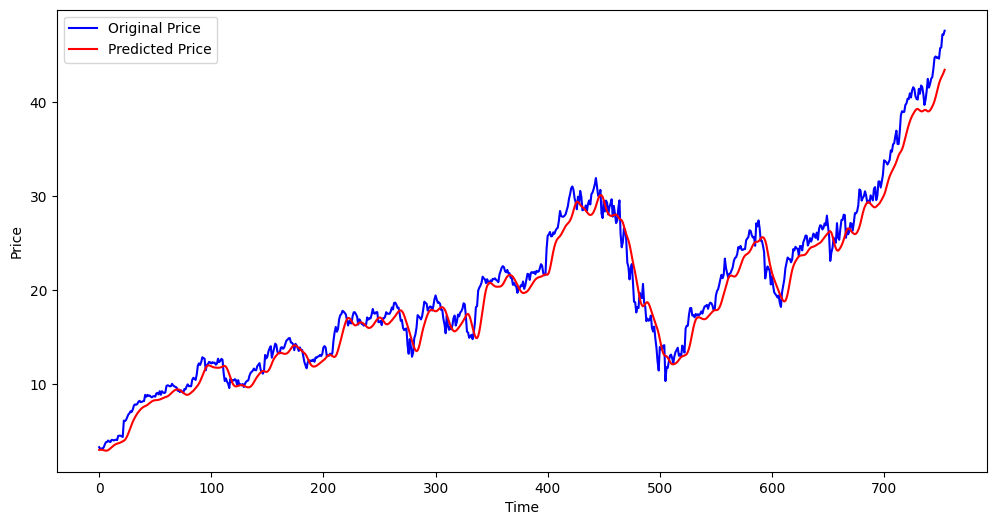

In [39]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()